In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the data
music_df = pd.read_csv(r"..\date\music_clean.csv")

In [13]:
music_df.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')

In [7]:
# Create X and y
#X = music_df.drop("genre", axis=1).values
X = music_df.drop("genre", axis=1)
y = music_df["genre"]


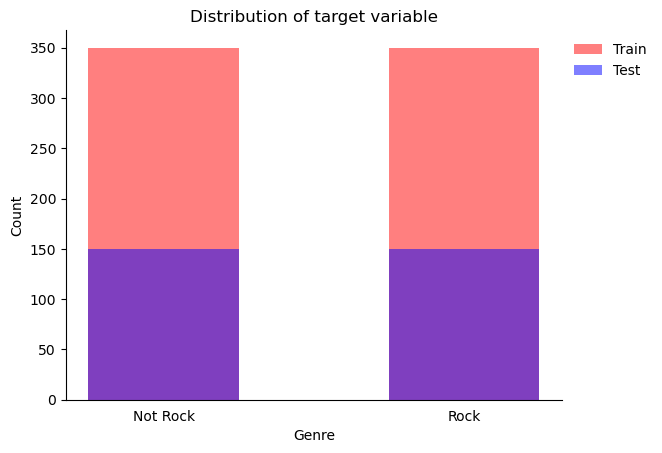

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Show distribution of target
g = sns.histplot(y_train, discrete= True, shrink=.5, color = 'red', alpha = 0.5, edgecolor='None')
g.set_xticks([0, 1]) 
g.set_xticklabels(['Not Rock', 'Rock']) 
g = sns.histplot(y_test, discrete= True, shrink=.5, color="blue", alpha = 0.5, edgecolor='None')
sns.despine(right=True, top=True)
g.set_xlabel("Genre")
plt.legend(["Train", "Test"], frameon=False)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title('Distribution of target variable')
g.tick_params(bottom=False)
plt.show()

Best parameters:
 0.9242857142857144 
 {'knn__metric': 'manhattan', 'knn__n_neighbors': 4}
Training confusion matrix:
 [[330  20]
 [  9 341]]
Test confusion matrix:
 [[137  13]
 [  0 150]]


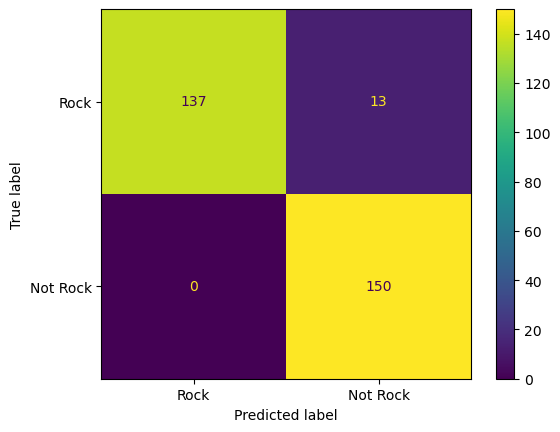

              precision    recall  f1-score   support

        Rock       1.00      0.91      0.95       150
    Not Rock       0.92      1.00      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [9]:
# Build steps for the pipeline
steps = [("imputer", SimpleImputer()), 
         ("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier(n_neighbors=3))]

# Create the parameter space
parameters = {
    "knn__n_neighbors": range(10),
    "knn__metric": ["cosine", "euclidean", "haversine", "manhattan"]
    }

# Create the pipeline
pipeline = Pipeline(steps)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)

print("Best parameters:\n", cv.best_score_, "\n", cv.best_params_)
print("Training confusion matrix:\n", confusion_matrix(y_train, cv.predict(X_train)))

# Make predictions on the test set
y_pred = cv.predict(X_test)

# Print the confusion matrix
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rock", "Not Rock"])
disp.plot()
plt.show()


print(classification_report(y_test, y_pred, target_names=["Rock", "Not Rock"]))